<a href="https://colab.research.google.com/github/fschnefeld/DummyRep/blob/main/DD_MLCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install sklearn
%pip install sweetviz
%pip install streamlit
%pip install pycaret

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
### importing all necessary libraries
import pandas as pd
import numpy as np
#from sklearn import RandomForestClassifier
#import streamlit as st
import sweetviz as sv
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from numpy.random import seed
from sklearn.model_selection import train_test_split
from scipy import stats
import pycaret


## Quick EDA

## Hypothesis formulation

#### Users with a higher event count will be more likely to convert
#### Users from an organic source or direct source will be more interested and thusly more likely to convert


In [18]:
#os.listdir()
file_path = '/content/drive/MyDrive/Colab_Notebooks/trainingdata.csv'
data = pd.read_csv(file_path)
data.head(10)


,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,session_end_time,session_start_time,event_count,country,session_duration_seconds,later_session_start_time,region,sub_region,source
0,False,NaN,1,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-04 07:55:15.048 UTC,2020-05-04 07:55:15.048 UTC,1,NaN,0,NaN,NaN,NaN,Google
1,False,NaN,2,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-11 03:49:15.592 UTC,2020-05-11 03:49:15.592 UTC,1,NaN,0,NaN,NaN,NaN,Google
2,False,NaN,3,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-02-28 22:00:46.528 UTC,2020-02-28 22:00:46.528 UTC,1,NaN,0,NaN,NaN,NaN,Google
3,False,NaN,4,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-21 21:50:58.028 UTC,2020-03-21 21:50:58.028 UTC,1,NaN,0,NaN,NaN,NaN,Google
4,False,NaN,5,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-09 14:53:37.777 UTC,2020-03-09 14:53:37.777 UTC,1,NaN,0,NaN,NaN,NaN,Google
5,False,NaN,6,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2019-12-11 10:27:15.083 UTC,2019-12-11 10:27:15.083 UTC,1,NaN,0,NaN,NaN,NaN,Google
6,False,NaN,7,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2019-11-18 12:22:03.067 UTC,2019-11-18 12:22:03.067 UTC,1,NaN,0,2019-11-18 12:22:45.192 UTC,NaN,NaN,Google
7,False,NaN,7,2,7,page_view,Chrome,Windows,DESKTOP,direct,2019-11-18 12:30:02.486 UTC,2019-11-18 12:22:45.192 UTC,3,NaN,437,2019-11-18 16:09:14.74 UTC,NaN,NaN,direct
8,False,NaN,7,3,222,page_view,Chrome,Windows,DESKTOP,direct,2019-11-18 16:12:10.117 UTC,2019-11-18 16:09:14.74 UTC,9,NaN,175,NaN,NaN,NaN,direct
9,False,NaN,8,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-12 17:11:24.35 UTC,2020-03-12 17:11:24.35 UTC,1,NaN,0,NaN,NaN,NaN,Google


In [ ]:
#data.describe
#data["event_count"].count()
data.shape

(2406154, 19)

                                             |          | [  0%]   00:00 -> (? left)


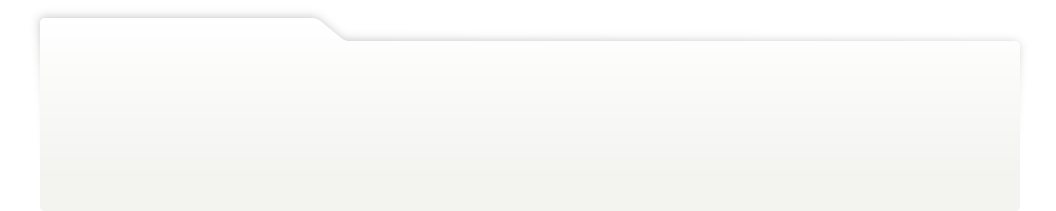
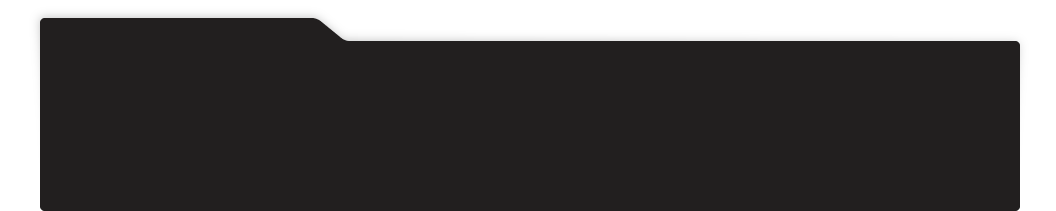
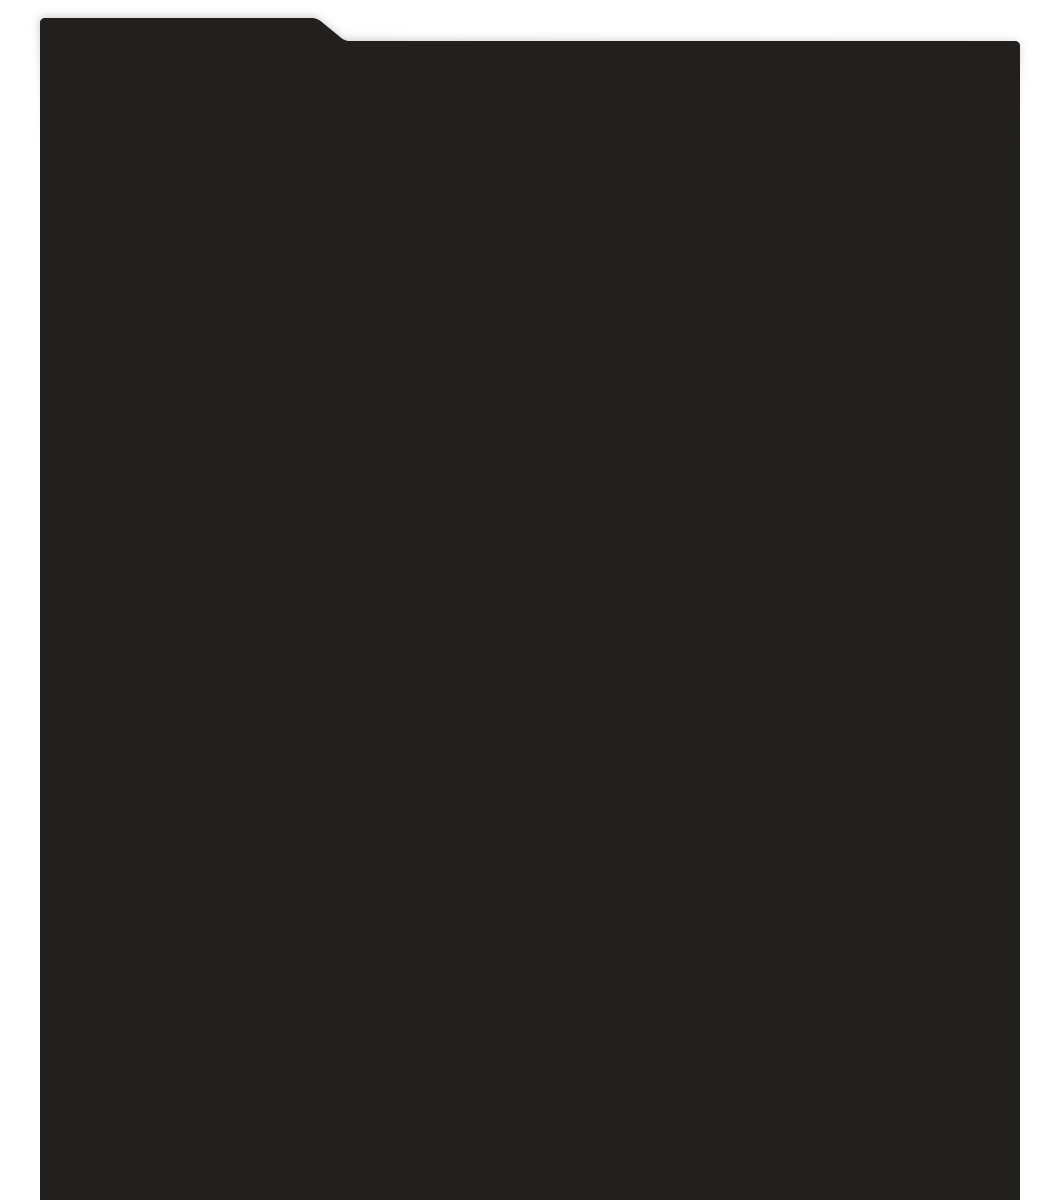
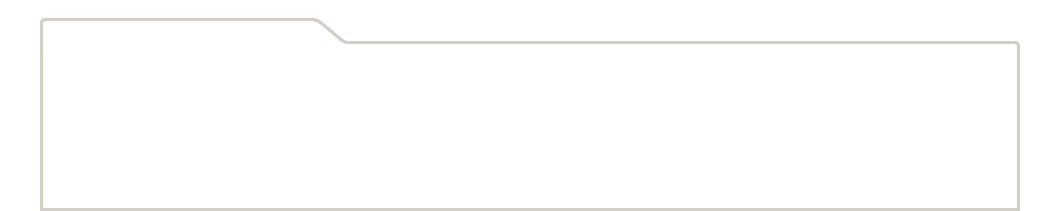
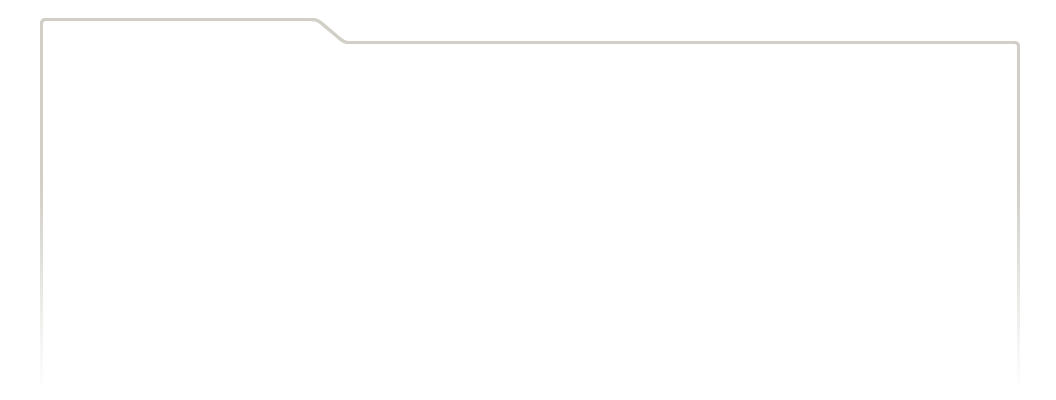
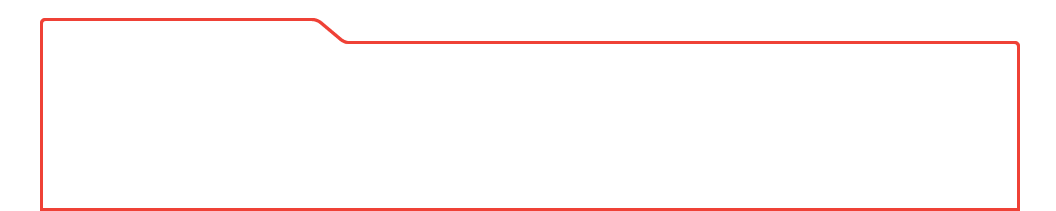
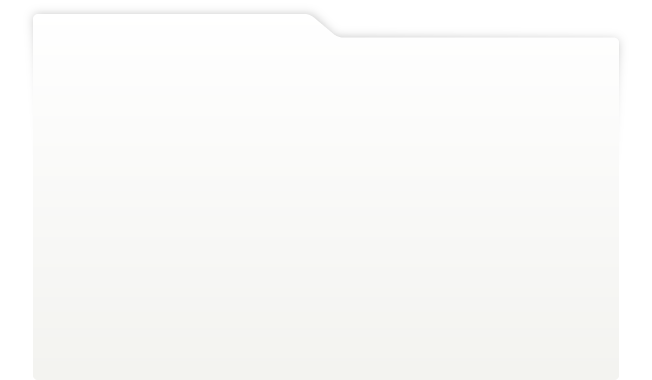
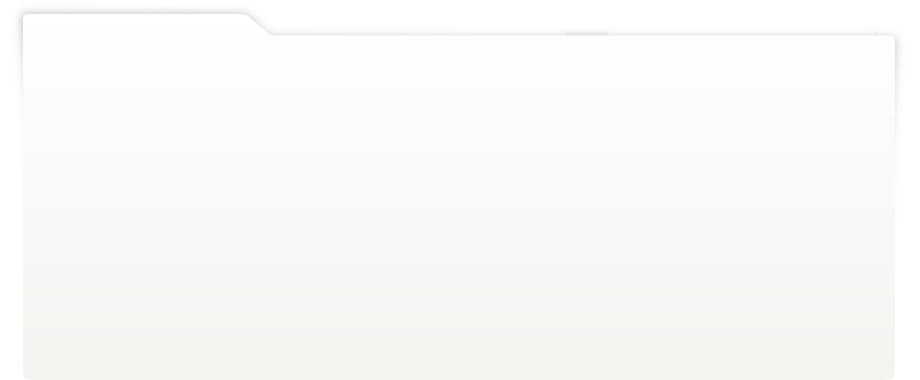
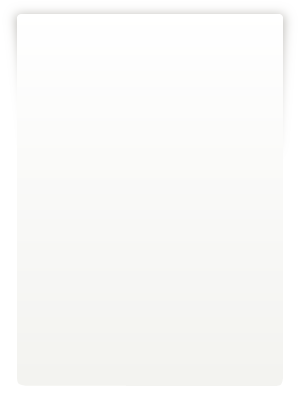
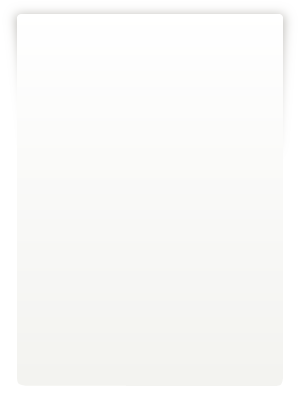
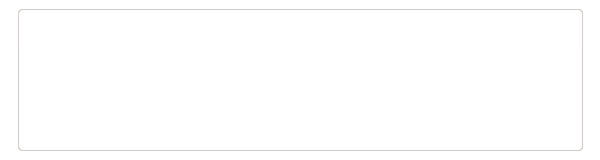
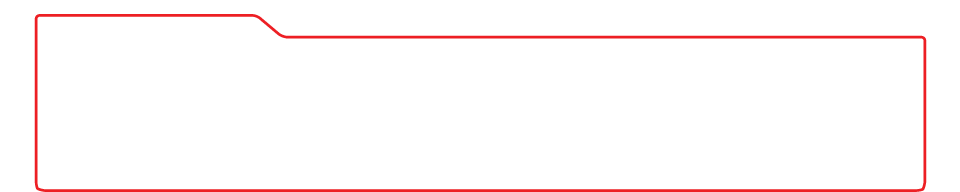
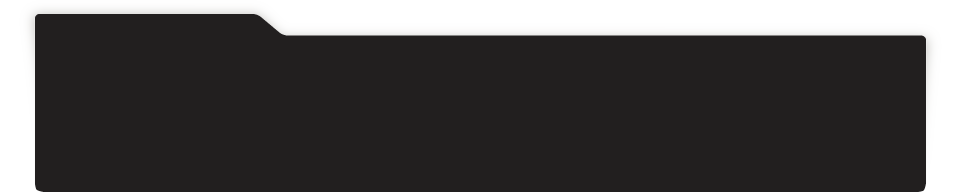
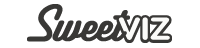
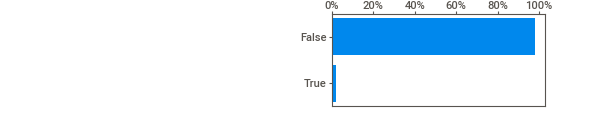
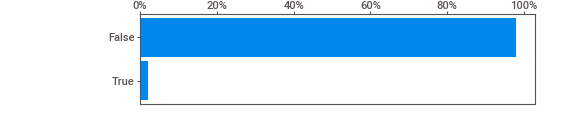
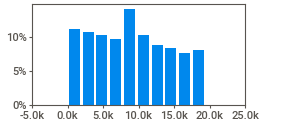
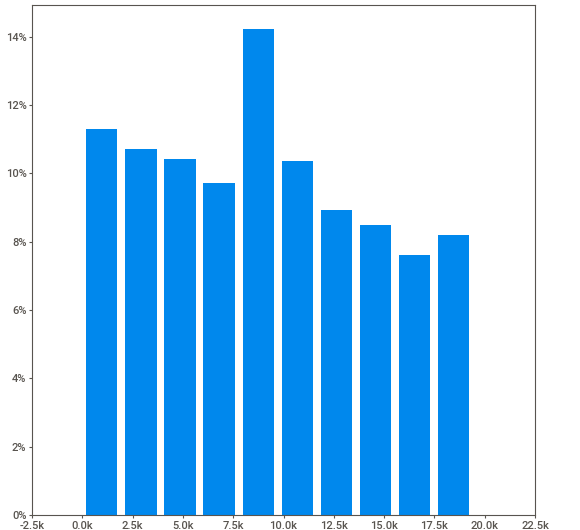
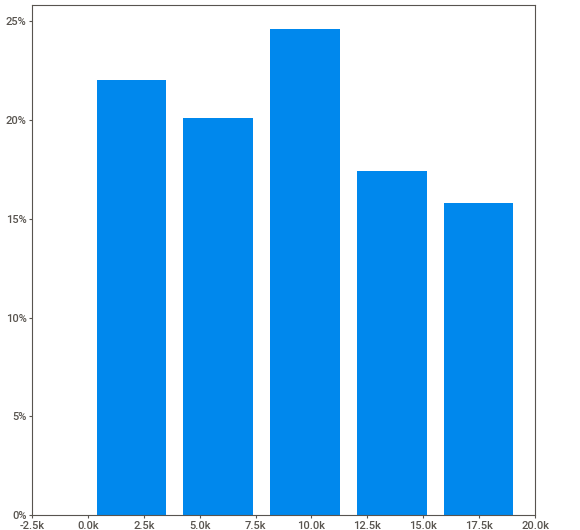
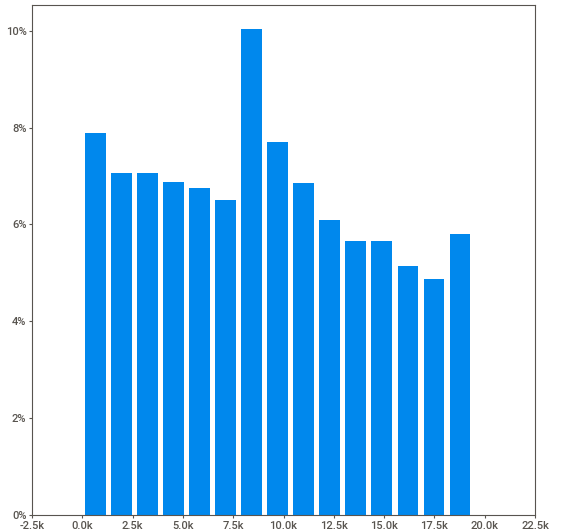
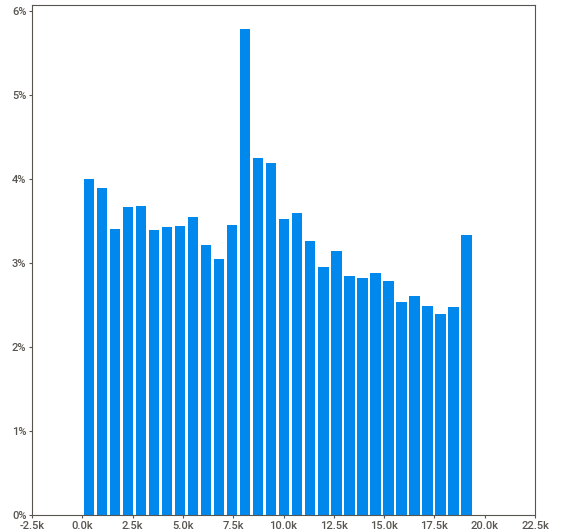
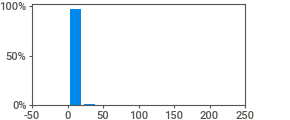
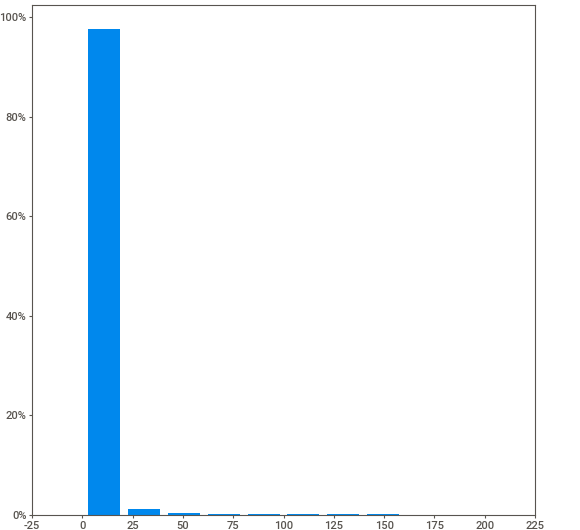
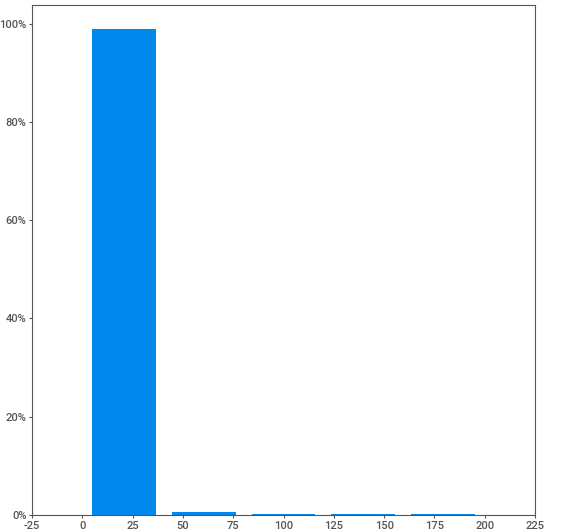
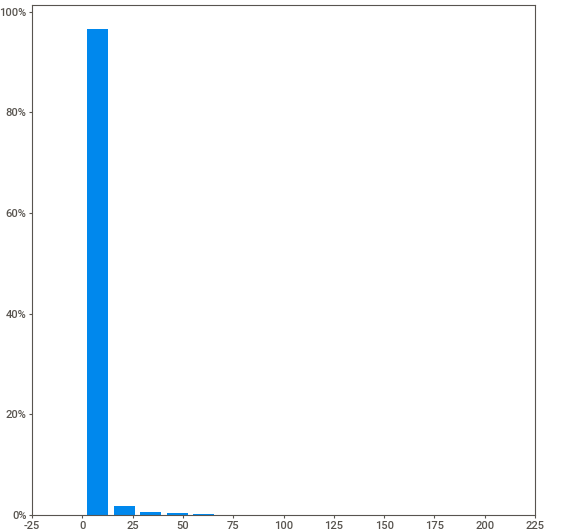
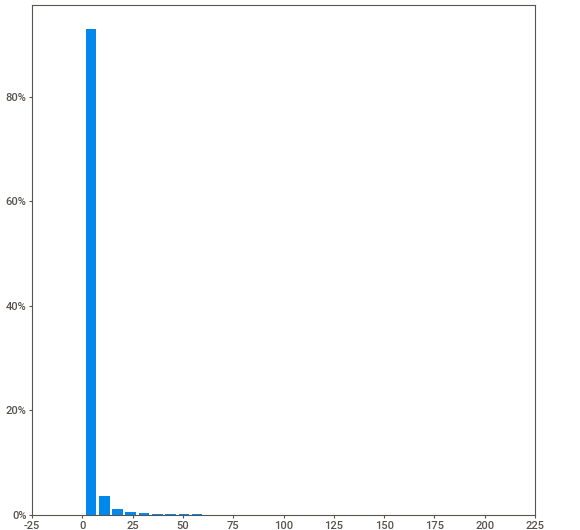
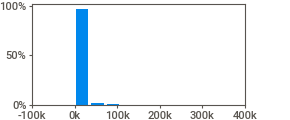
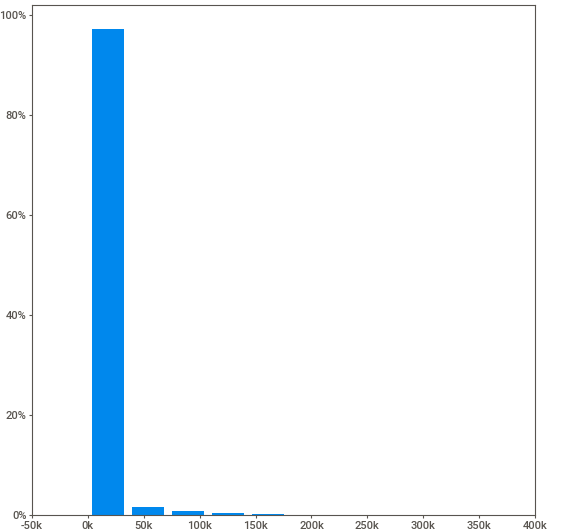
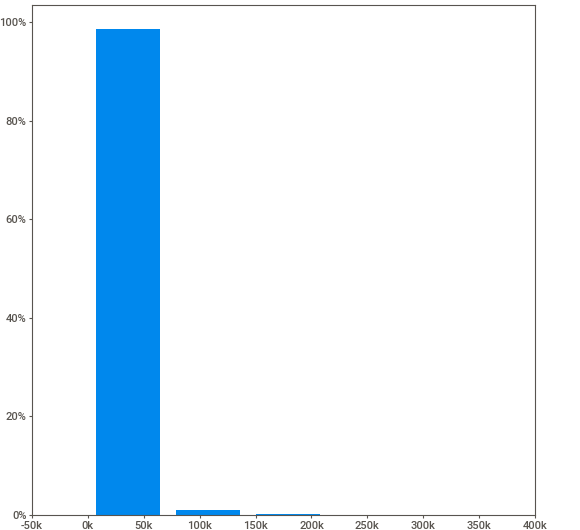
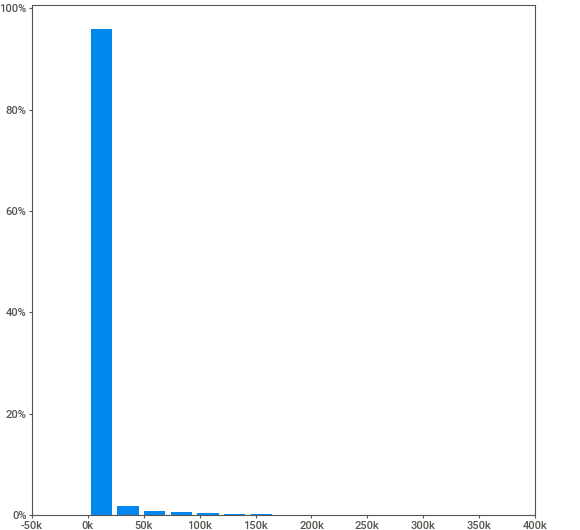
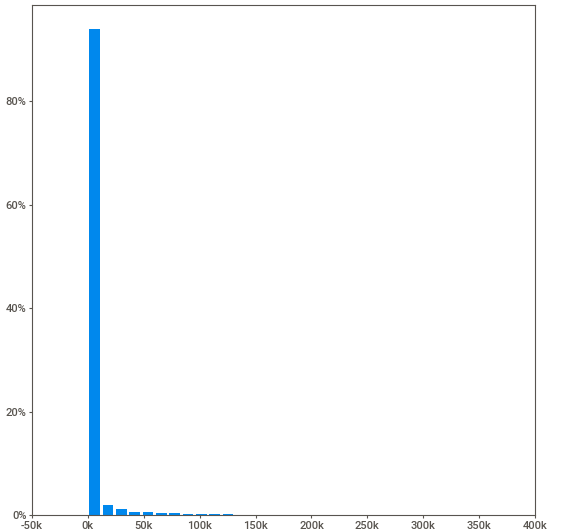
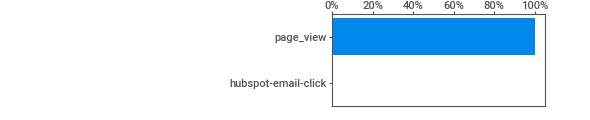
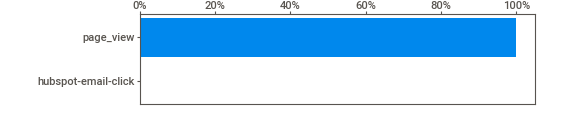
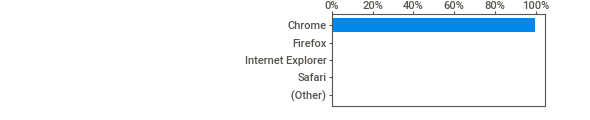
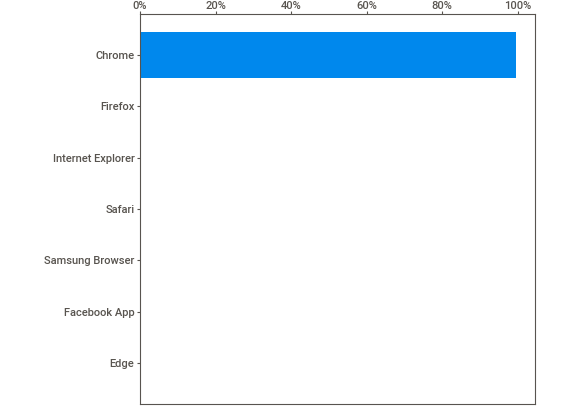
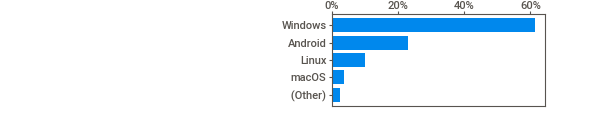
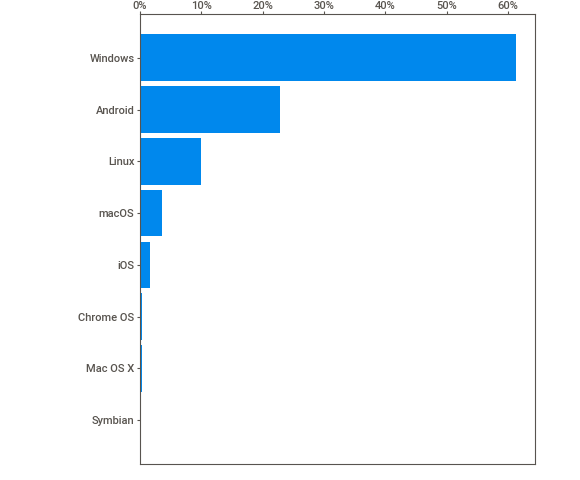
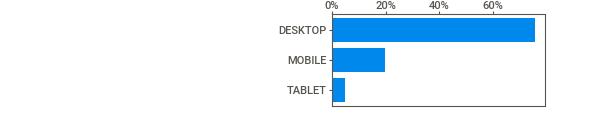
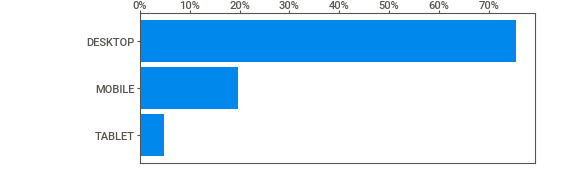
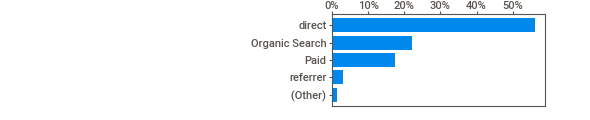
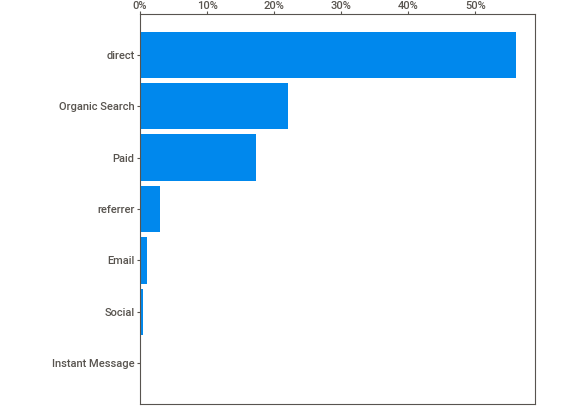
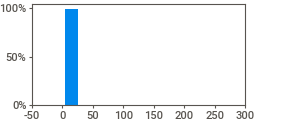
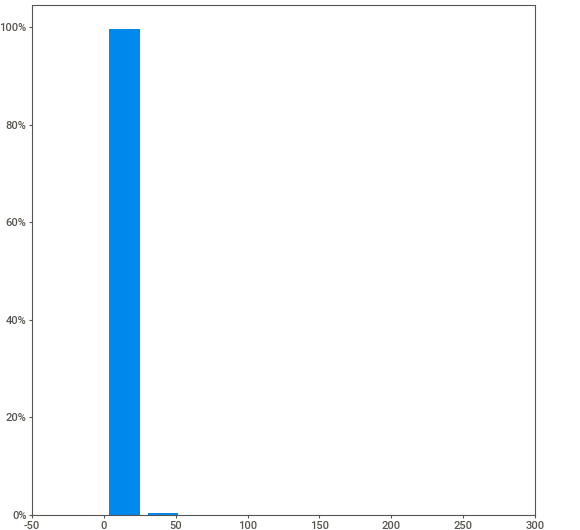
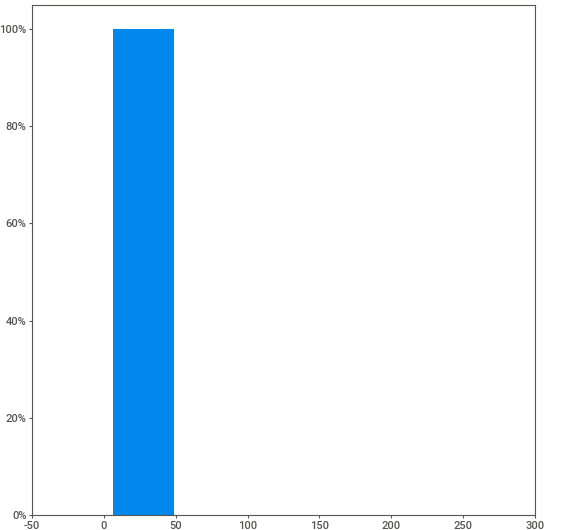
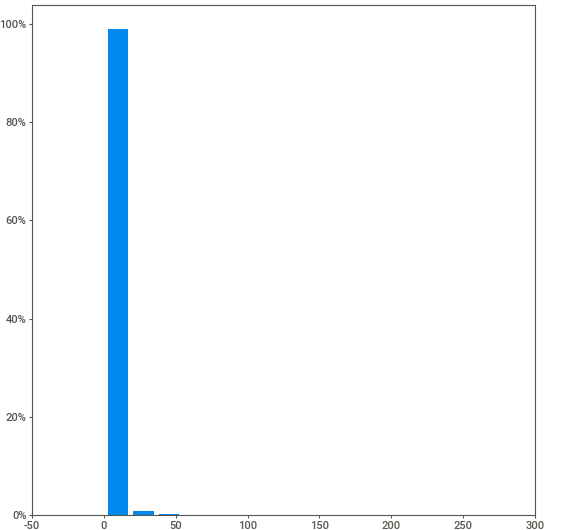
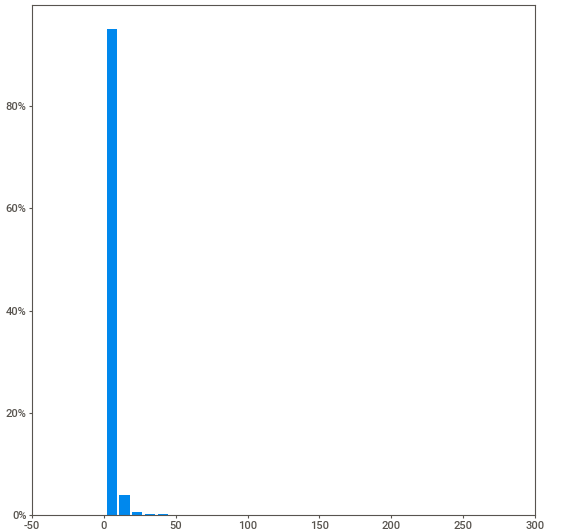
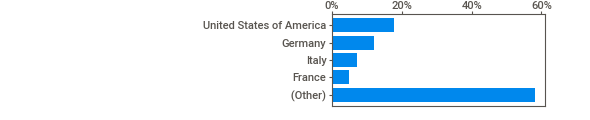
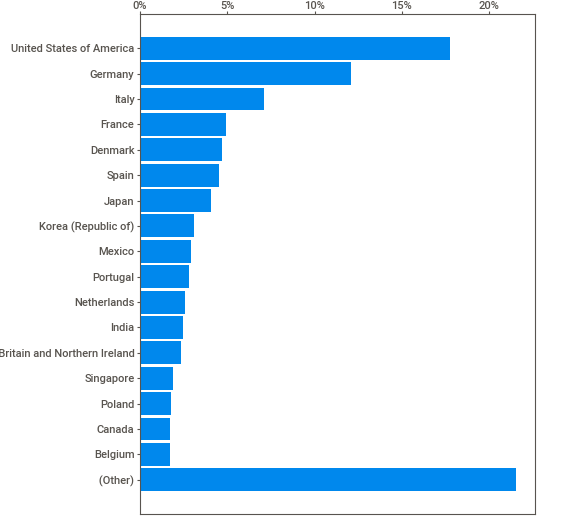
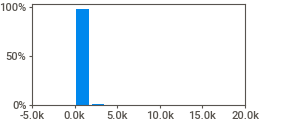
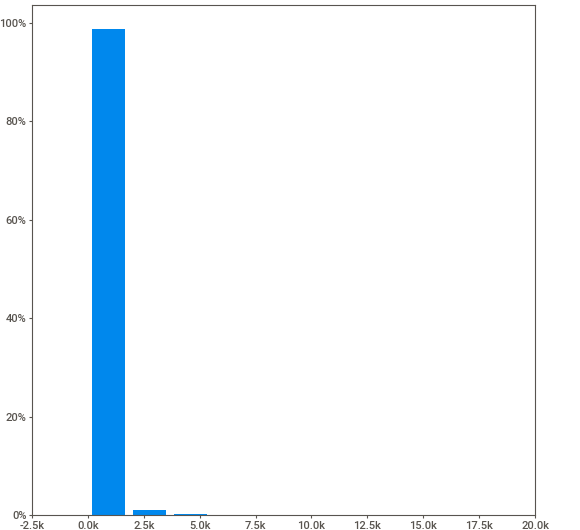
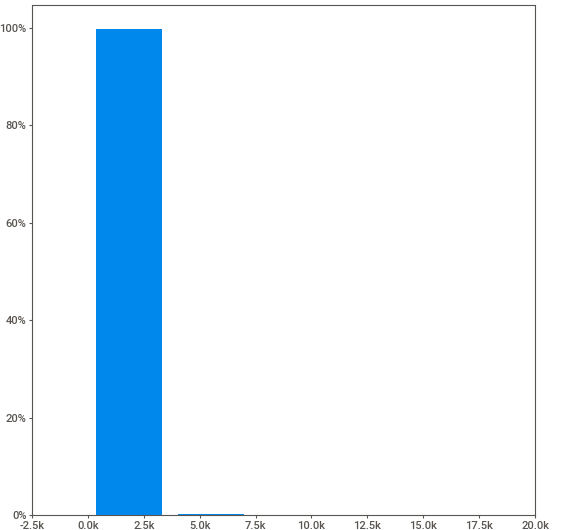
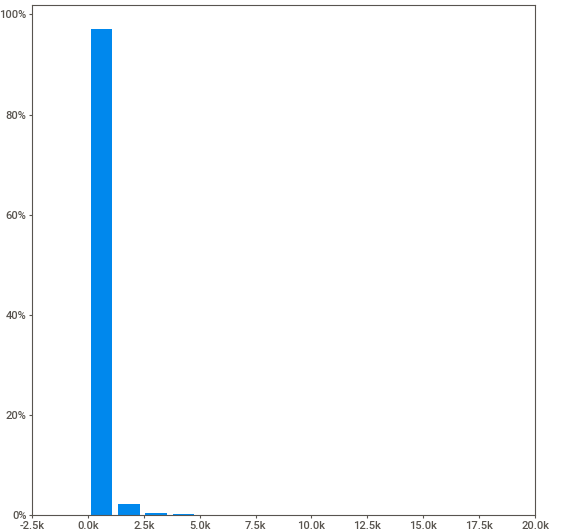
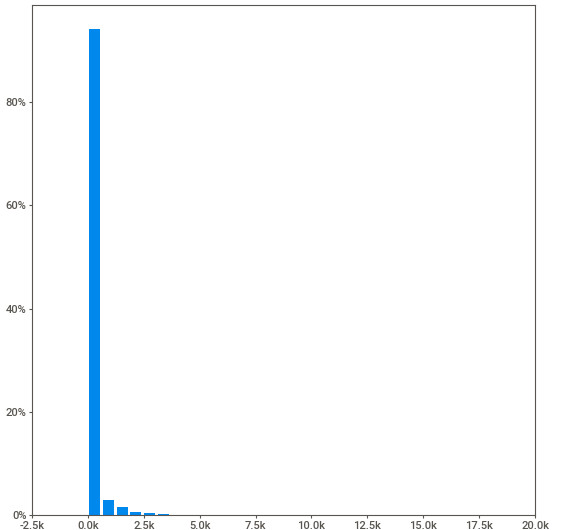
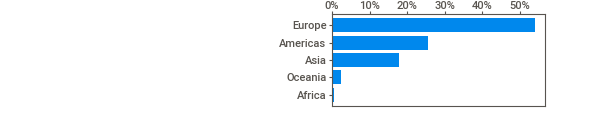
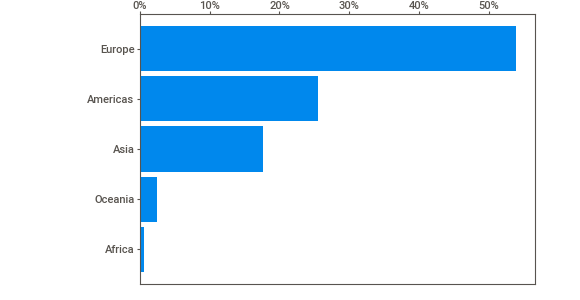
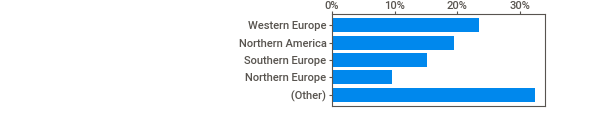
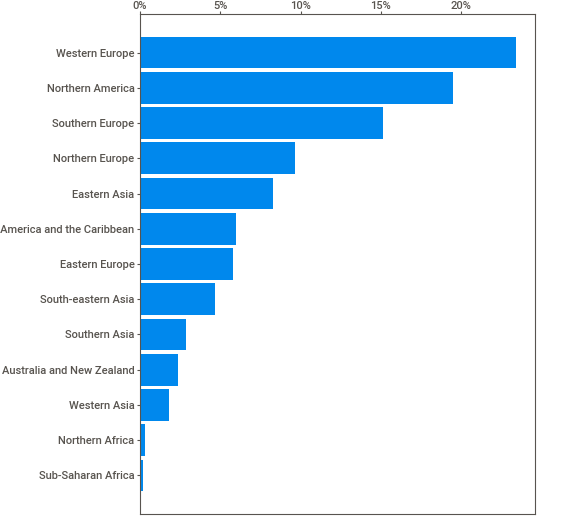
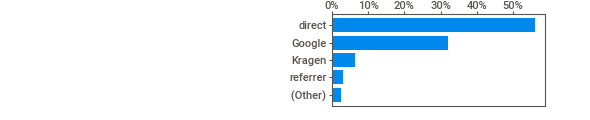
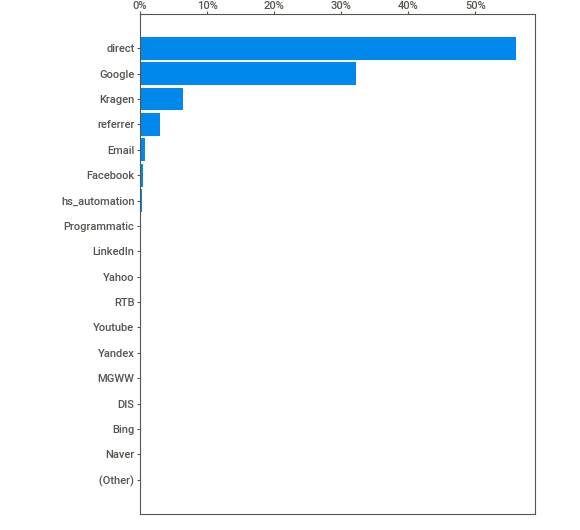
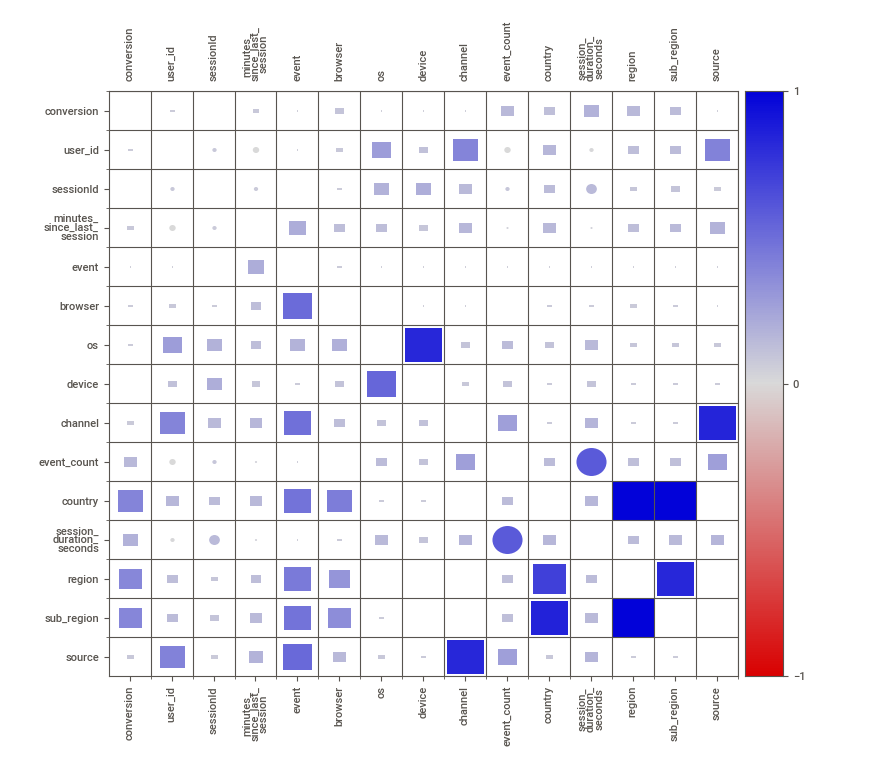
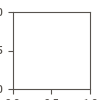

In [ ]:
report = sv.analyze(data)
report.show_notebook()


## Decision to be made:

### Continue only with rows that contain conversion? (No null errors?)

### Continue with all and impute values

### Encode categorical columns?

In [ ]:
#Feature correlation diagram
data.corr()

,conversion,user_id,sessionId,minutes_since_last_session,event_count,session_duration_seconds
conversion,1.000000,0.000205,-0.014363,0.018360,0.132044,0.014664
user_id,0.000205,1.000000,-0.029628,-0.002282,-0.010829,-0.012441
sessionId,-0.014363,-0.029628,1.000000,-0.025361,0.042121,0.194905
minutes_since_last_session,0.018360,-0.002282,-0.025361,1.000000,-0.013477,-0.007808
event_count,0.132044,-0.010829,0.042121,-0.013477,1.000000,0.254201
session_duration_seconds,0.014664,-0.012441,0.194905,-0.007808,0.254201,1.000000


In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['conversion'], **{})
chart

<Axes: xlabel='channel', ylabel='session_duration_seconds'>

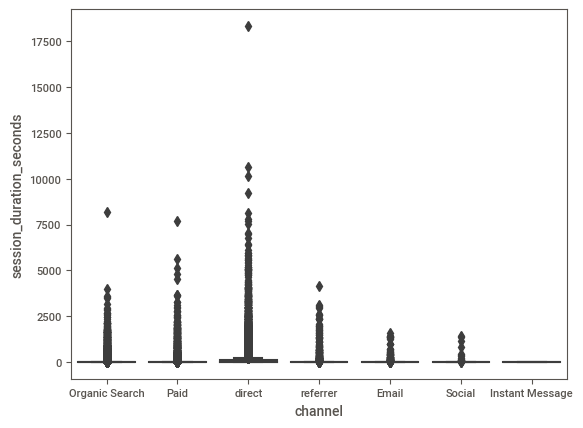

In [ ]:
#sns.regplot(x="session_duration_seconds", y="region", data=data)
#sns.histplot(x="conversion", y="channel", data=data)
#sns.boxplot(x="channel", y="session_duration_seconds", data=data)


<Axes: xlabel='channel', ylabel='count'>

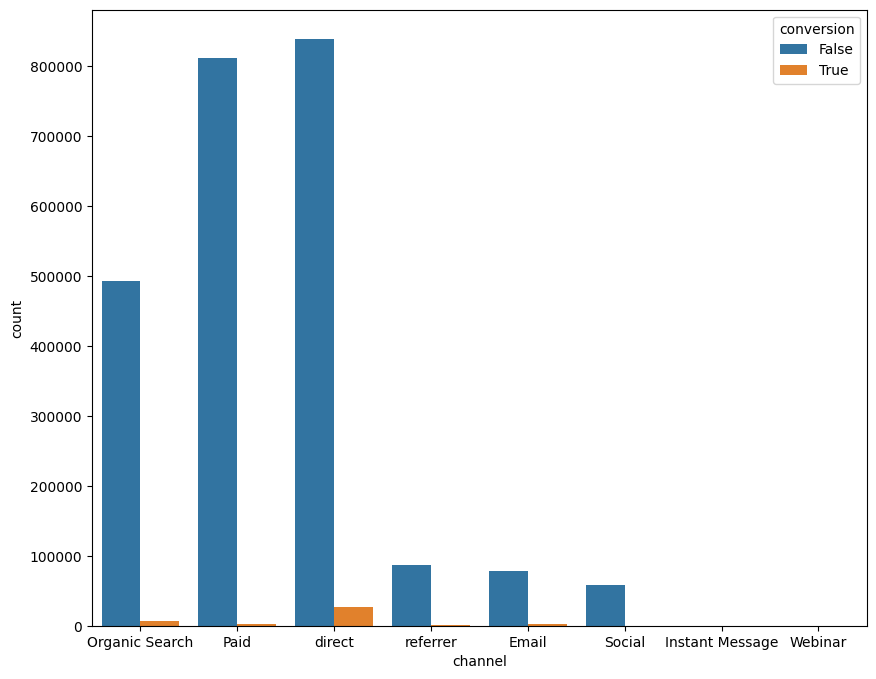

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="channel", hue="conversion", data=cleaner_data)

<Axes: xlabel='region', ylabel='count'>

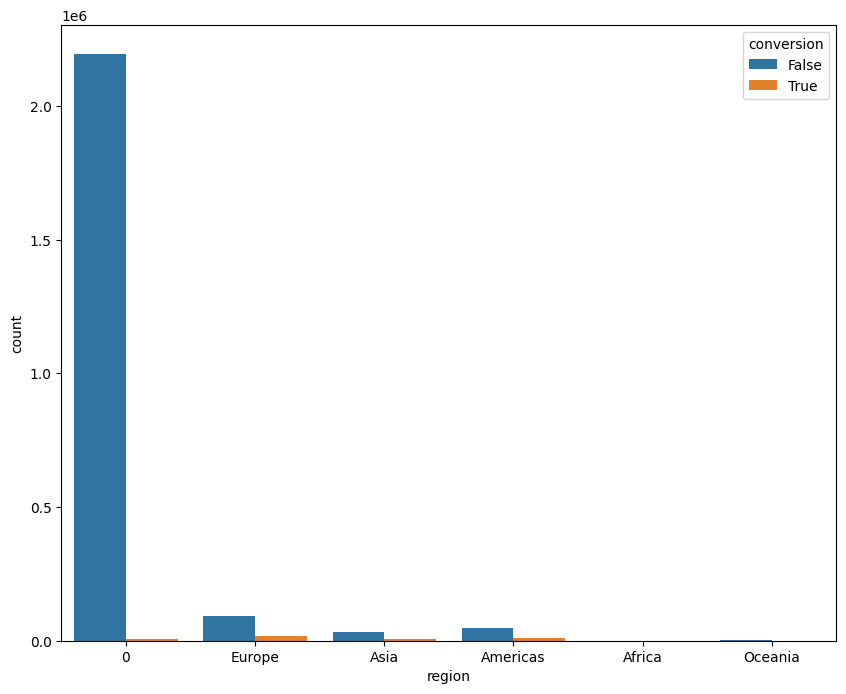

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="region", hue="conversion", data=cleaner_data)

Following observations were made about the data that could have a result on the need for feature selection and modeling building:

- The distance between max and median for event count was significant, indicating that removing outliers would have an effect on the feature
- Direct traffic provides a lot of events
- Same goes for session duration, which also has a positive effect on event count, according to the pearson correlation diagram
- 'country' has a lot of missing columns, indicating that it may impact the accuracy of the model. This because it decreases the data size.
- 'counversion_time' is missing 98% of rows, but can still be useful to indicate when a user *does not* or *should not* convert.
- Event count and session duration look to have the biggest impact on the number of conversions
**So, the prevailing logic so far seems to be that an the higher the amount of events and the longer the session, the more likely a visitor is to convert. **



## Data Cleaning and Preprocessing

EDA revealed quite a few missing values in certain potential features. Here I have to choose between imputing the mean for the data volume (and shape)to stay the way it is.  

In [ ]:
#data.drop(['session_start_time', 'session_end_time'], axis=1, inplace=True)
data['converts_next_session'] = 0
data.head(100)
#clean_data.describe()

,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,event_count,country,session_duration_seconds,later_session_start_time,region,sub_region,source,converts_next_session
0,False,NaN,1,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0
1,False,NaN,2,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0
2,False,NaN,3,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0
3,False,NaN,4,1,0,page_view,Chrome,Windows,DESKTOP,Paid,1,NaN,0,NaN,NaN,NaN,Google,0
4,False,NaN,5,1,0,page_view,Chrome,Windows,DESKTOP,Paid,1,NaN,0,NaN,NaN,NaN,Google,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,NaN,50,2,0,page_view,Chrome,macOS,DESKTOP,direct,5,NaN,70,2020-01-21 14:55:06.675 UTC,NaN,NaN,direct,0
96,False,NaN,51,1,0,page_view,Chrome,macOS,DESKTOP,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0
97,False,NaN,52,1,0,page_view,Chrome,Android,MOBILE,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0
98,False,NaN,53,1,0,page_view,Chrome,Android,MOBILE,Organic Search,1,NaN,0,NaN,NaN,NaN,Google,0


In [19]:
cleaner_data = data.fillna(0)
cleaner_data.head()

,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,session_end_time,session_start_time,event_count,country,session_duration_seconds,later_session_start_time,region,sub_region,source
0,False,0,1,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-04 07:55:15.048 UTC,2020-05-04 07:55:15.048 UTC,1,0,0,0,0,0,Google
1,False,0,2,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-11 03:49:15.592 UTC,2020-05-11 03:49:15.592 UTC,1,0,0,0,0,0,Google
2,False,0,3,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-02-28 22:00:46.528 UTC,2020-02-28 22:00:46.528 UTC,1,0,0,0,0,0,Google
3,False,0,4,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-21 21:50:58.028 UTC,2020-03-21 21:50:58.028 UTC,1,0,0,0,0,0,Google
4,False,0,5,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-09 14:53:37.777 UTC,2020-03-09 14:53:37.777 UTC,1,0,0,0,0,0,Google


### Scaling

## Building a model

With limited time, I had to choose between two main frameworks for lead prediction:

Simple Logistic Regressor for prediction.

K-means for classification.

K-means would work best if we were to classify visitors for the purpose of lead scoring, where a regressor would tell us how likely a visitor is to convert, given a set of features.


### Feature selection

In [20]:
#num_features = ['session_duration_seconds', 'event_count', 'minutes_since_last_session']
cat_features = ['event', 'region', 'channel', 'device', 'os', 'source']

print(cleaner_data[cat_features].nunique())

event       2
region      6
channel     8
device      5
os         18
source     50
dtype: int64


### Encoding categorical features




In [21]:
encoded_data = pd.get_dummies(cleaner_data, columns=cat_features)
encoded_data
#correlations=encoded_data.corr().sort_values(ascending=False)
#print(correlations)
#plt.figure(figsize=(30,40))
#sns.heatmap(encoded_data.corr(), annot=True)
#encoded_data.corr()

,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,browser,session_end_time,session_start_time,event_count,country,...,source_ebooks,source_hs_automation,source_organic_social_media,source_outbound,source_referrer,source_sendinblue,source_sniply,source_vkontakte,source_wechat,source_whippany
0,False,0,1,1,0,Chrome,2020-05-04 07:55:15.048 UTC,2020-05-04 07:55:15.048 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,2,1,0,Chrome,2020-05-11 03:49:15.592 UTC,2020-05-11 03:49:15.592 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,3,1,0,Chrome,2020-02-28 22:00:46.528 UTC,2020-02-28 22:00:46.528 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,4,1,0,Chrome,2020-03-21 21:50:58.028 UTC,2020-03-21 21:50:58.028 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,5,1,0,Chrome,2020-03-09 14:53:37.777 UTC,2020-03-09 14:53:37.777 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406149,False,0,1349317,1,0,Chrome,2020-07-06 01:20:09.169 UTC,2020-07-06 01:20:09.169 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
2406150,False,0,1349318,1,0,Chrome,2019-11-20 09:48:22.022 UTC,2019-11-20 09:48:22.022 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
2406151,False,0,1349319,1,0,Chrome,2019-11-22 06:54:16.938 UTC,2019-11-22 06:54:16.938 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0
2406152,False,0,1349320,1,0,Chrome,2020-03-05 16:53:40.848 UTC,2020-03-05 16:53:40.848 UTC,1,0,...,0,0,0,0,0,0,0,0,0,0


### Model fitting and training

In [25]:
x=encoded_data.drop(columns=["conversion", 'conversion_time', 'session_end_time', 'session_start_time', 'later_session_start_time', 'browser', 'country', 'sub_region'])
y=encoded_data["conversion"]

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [26]:
from sklearn.linear_model import LogisticRegression,LinearRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)


LogisticRegression()

## Predictions

In [27]:
y_pred_logr=logr.predict(x_test)
print(y_pred_logr)

[False False False ... False False False]


## Model evaluation

In [28]:
from sklearn.metrics import r2_score,accuracy_score,recall_score
print(accuracy_score(y_test,y_pred_logr))  # taking accuracy score for calculation cause problem statement more focus on type 1 error
print(recall_score(y_test,y_pred_logr))       # ('False postive')

0.9837188377307364
0.0


### Visualisations

In [31]:
#sns.heatmap(y_test)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_logr)
print(cm)

[[473396      6]
 [  7829      0]]


<Axes: >

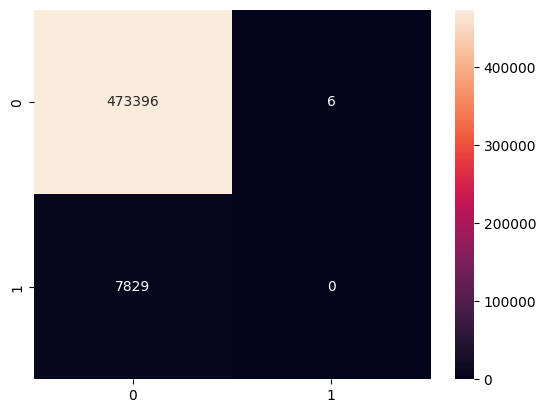

In [32]:
sns.heatmap(cm, annot=True, fmt='d')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    473402
        True       0.00      0.00      0.00      7829

    accuracy                           0.98    481231
   macro avg       0.49      0.50      0.50    481231
weighted avg       0.97      0.98      0.98    481231



In [ ]:
from sklearn.metrics import mean_squared_error
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

## Future potential

### Enrich with API data

In [ ]:
base_url = 'https://sampleapi.com/api'
api_method = "API.getData"
params = {
    "format": 'json',
    "api_key": 'api_key_value',
    "client_secret": 'client_secret_value',
    "client_id": ""
}

response = requests.get(f"{base_url}?module{api_method}", params=params)

if response.status_code != 200:
    print("There was an error", response.status_code)
print(response.json())
api_data = response.json().pd_toDataFrame()

## Append to existing dataFrame


## Alternate version with Decision Tree

In [ ]:
data.columns

Index(['conversion', 'conversion_time', 'user_id', 'sessionId',
       'minutes_since_last_session', 'event', 'browser', 'os', 'device',
       'channel', 'session_end_time', 'session_start_time', 'event_count',
       'country', 'session_duration_seconds', 'later_session_start_time',
       'region', 'sub_region', 'source'],
      dtype='object')

In [ ]:
new_data = data['conversion']
new_data.head()

0    False
1    False
2    False
3    False
4    False
Name: conversion, dtype: bool

In [ ]:
from sklearn.tree import DecisionTreeRegressor
data_df = encoded_data
#data_df.head()
x=data_df.drop(columns=["conversion", 'conversion_time', 'later_session_start_time', 'browser', 'country', 'sub_region'])
y=data_df["conversion"]

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)


In [ ]:
#data_df.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
rfc=RandomForestClassifier()


In [ ]:
#
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_rfc)

NameError: ignored

## Business applications

#### The primary model could be used to predict the likelihood of a conversion, if a visitor exhibits the pattern of the model.
#### The model (with improvements) could be able to consider traffic from a certain source (such as email) and predict the likelihood of converting.
#### This could also be used to inform strategy, gaining insight into the model's features' performance in relation to one another. Where the region has a positive correlation with source, further experimenting could be beneficial.
#### The model could potentially also be paired with other models such as classification models, to prioritize high-value leads

##### This could include capturing leads from a certain region/country




## Super lo-fi version, taken from the internet. Takes MVT Approach

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data from a local CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/trainingdata.csv')

# Assuming the target column is named 'conversion' and has values 0 or 1
# 0: Convert in next session, 1: Convert in this session
X = data.drop(["conversion"], axis=1)
y = data['conversion']

# Define categorical and numerical columns
categorical_cols = ['event', 'region', 'channel', 'device', 'source']
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression(multi_class='ovr', random_state=42))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

next_session_conversions = (y_pred == 2)

# Indices of users predicted to convert in the next session
indices_next_session = [index for index, value in enumerate(next_session_conversions) if value]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    710058
        True       0.51      0.03      0.05     11789

    accuracy                           0.98    721847
   macro avg       0.75      0.51      0.52    721847
weighted avg       0.98      0.98      0.98    721847



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Indices of users predicted to convert in the next session:", indices_next_session)

[[709738    320]
 [ 11451    338]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    710058
        True       0.51      0.03      0.05     11789

    accuracy                           0.98    721847
   macro avg       0.75      0.51      0.52    721847
weighted avg       0.98      0.98      0.98    721847

Indices of users predicted to convert in the next session: []


Indices of users predicted to convert in the next session: []
